<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Function-definitions" data-toc-modified-id="Function-definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Function definitions</a></span></li><li><span><a href="#Setting-global-variables" data-toc-modified-id="Setting-global-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting global variables</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Finding-optimal-k-using-elbow-method" data-toc-modified-id="Finding-optimal-k-using-elbow-method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Finding optimal k using elbow method</a></span></li><li><span><a href="#Clustering-summary" data-toc-modified-id="Clustering-summary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Clustering summary</a></span></li></ul></li><li><span><a href="#Plotting-clusters-(not-completed)" data-toc-modified-id="Plotting-clusters-(not-completed)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting clusters (not completed)</a></span></li></ul></div>

# Import libraries

In [11]:
import string
import collections
import nltk
import pandas as pd
import matplotlib.pyplot as plt
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

# Function definitions

In [13]:
def process_text(text, stem=True):

    # Tokenize text and stem words removing punctuation
    # text = text.translate(None, string.punctuation)
    
    tokens = word_tokenize(text)
 
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
 
    return tokens
 
 
def cluster_texts(texts, clusters=3):

    # Transform texts to Tf-Idf coordinates and cluster texts using K-Means 

    vectorizer = TfidfVectorizer(tokenizer=process_text,
                                 stop_words=stopwords.words('english'),
                                 max_df=0.5,
                                 min_df=0.1,
                                 lowercase=True)
 
    tfidf_model = vectorizer.fit_transform(texts).todense()
    km_model = KMeans(n_clusters=clusters)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
    #df_clusters = pd.DataFrame(columns=['No', 'Cluster']
 
                               
    rows_list = []
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
        rows_list.append([idx, label])
 
    df_clusters = pd.DataFrame(rows_list, columns = ['Text', 'Cluster'])  
    
    # return clustering
    return df_clusters, tfidf_model, km_model

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kypexin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kypexin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Setting global variables

In [46]:
# articles list can be used for testing; when clustered with n_clusters = 3, 
# each 10 consequtive sentences form a cluster: cricket, AI, chemistry topics 

articles = [
    "Cricket is a bat and ball game played between two teams of eleven players each on a cricket field.", 
    'Each phase of play is called an innings during which one team bats, attempting to score as many runs as possible.', 
    'The teams have one or two innings apiece and, when the first innings ends, the teams swap roles for the next innings', 
    'Before a match begins, the two team captains meet on the pitch for the toss of a coin to determine which team will bat first.', 
    'Two batsmen and eleven fielders then enter the field and play begins when a member of the fielding team, known as the bowler, delivers the ball.', 
    'The most common dismissal in cricket match are bowled, when the bowler hits the stumps directly with the ball and dislodges the bails. Batsman gets out.', 
    'Runs are scored by two main methods: either by hitting the ball hard enough for it to cross the boundary, or by the two batsmen swapping ends.', 
    'The main objective of each team is to score more runs than their opponents.', 
    'If the team batting last is all out having scored fewer runs than their opponents, they are said to have "lost by n runs".', 
    'The role of striker batsman is to prevent the ball from hitting the stumps by using his bat and, simultaneously, to strike it well enough to score runs', 
    'Artificial intelligence is intelligence exhibited by machines, rather than humans or other animals. ', 
    'the field of AI research defines itself as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of success at some goal', 
    'The overall research goal of artificial intelligence is to create technology that allows computers and machines to function in an intelligent manner.', 
    'Natural language processing[77] gives machines the ability to read and understand human language and extract intelligence from it.', 
    'AI researchers developed sophisticated mathematical tools to solve specific subproblems. These tools are truly scientific, in the sense that their results are both measurable and verifiable.', 
    'An intelligent agent is a system that perceives its environment and takes actions which maximize its chances of success.', 
    'AI techniques have become an essential part of the technology industry, helping to solve many challenging problems in computer science.', 
    'Recent advancements in AI, and specifically in machine learning, have contributed to the growth of Autonomous Things such as drones and self-driving cars.', 
    'AI research was revived by the commercial success of expert systems,[28] a form of AI program that simulated the knowledge and analytical skills of human experts.', 
    'Advanced statistical techniques (loosely known as deep learning), access to large amounts of data and faster computers enabled advances in machine learning and perception.', 
    'A compound is a pure chemical substance composed of more than one element and the properties of a compound bear little similarity to those of its elements.', 
    'Since the properties of an element are mostly determined by its electron configuration, the properties of the elements likewise show recurring patterns or periodic behaviour.', 
    'The property of inertness of noble gases makes them very suitable in chemicals where reactions are not wanted.', 
    'The atom is also the smallest entity that can be envisaged to retain the chemical properties of the element, such as electronegativity, ionization potential and preferred oxidation state.', 
    'The nucleus is made up of positively charged protons and uncharged neutrons (together called nucleons), while the electron cloud consists of negatively charged electrons which orbit the nucleus', 
    'The atom is the basic unit of chemistry. It consists of a dense core called the atomic nucleus surrounded by a space called the electron cloud.', 
    'A chemical reaction is a transformation of some substances into one or more different substances.', 
    'Chemistry is sometimes called the central science because it bridges other natural sciences, including physics, geology and biology.', 
    'Chemistry includes topics such as the properties of individual atoms and how atoms form chemical bonds to create chemical compounds.', 
    'Chemistry is a branch of physical science that studies the composition, structure of atoms, properties and change of matter.', 
]

fname = "phrases.csv"      # file containing phrases, one per each line
lineList = []
min_sentence_length = 10    # minimum length of a sentence to be used in clustering
num_clusters = 10          # number of clusters to find
 

# Clustering

In [47]:
# populate lineList with sentences starting from minimum length; shorter sentences are omitted

with open(fname, 'r') as f:
    for line in f:
        line = line.rstrip()
        words = line.split()
        if len(words) >= min_sentence_length:
            lineList.append(line)

# running clustering algorithm            
            
df_clusters, tfidf, km = cluster_texts(lineList, num_clusters)

# for testing on on 'articles' list run:
# df_clusters, tfidf, km = cluster_texts(articles, 3)

# print(dict(clusters))

# make a data frame with sentences and corresponding cluster number for each

df_articles = pd.DataFrame({'Text':lineList})

res = df_clusters.merge(df_articles, left_on='Text', right_on=df_articles.index.values).drop(['Text', 'Text_x'], axis = 1).rename(columns={"Text_y": "Text"}).sort_values(by = 'Cluster')

pd.set_option('display.max_colwidth', -1)
res

,Cluster,Text
210,0,"""Society is built by the rules of """"natural selection"""", or """"survival of the fittest"""""""
111,0,"Body of Christ - eat and drink my flesh, like cannibals"
114,0,"Vision is a primordial sense, as the light is an ancient phenomenon"
286,0,"Four main elements in Nature - air, water, ground, and fire"
284,0,"Like a son feels sad about his mom, we are sad about the Earth, we don't have another one"
117,0,"""We """"create"""", like the ants, or the squirrels in a wheel"""
120,0,"All people are good people, and I'm like a dog"
280,0,"Before appearance of the Earth, there was a planet Phaeton, that collided with Sun"
123,0,"World is a mirror of your inner-self, we create it with our hands and imagination"
125,0,"The more human is born, the less Nature is left"


## Finding optimal k using elbow method

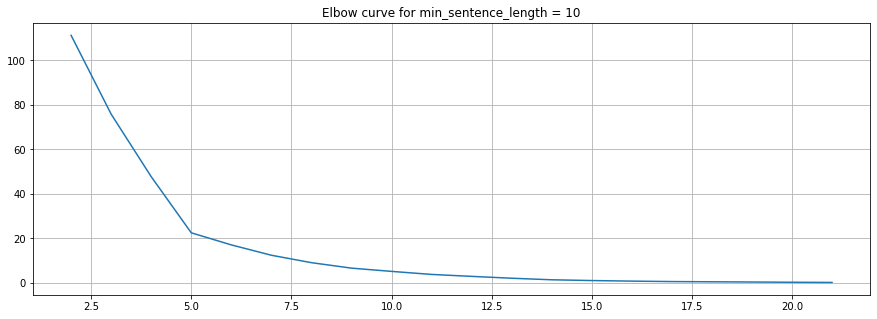

In [44]:
# elbow method allows to visually find an optimum number of clusters, 
# which is different for different minimum sentence length
#
# for sentences 3-5 words optimum number is 3
# for sentences 6-9 words optimum number is 4

X = tfidf
distorsions = []
max_clusters_elbow = 22

for k in range(2, max_clusters_elbow):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_clusters_elbow), distorsions)
plt.grid(True)
plt.title('Elbow curve for min_sentence_length = ' + str(min_sentence_length))
plt.show()

## Clustering summary

In [48]:
# print number of clusters and distribution of sentences per cluster

n_clusters = res['Cluster'].nunique()
cluster_sizes = res.groupby('Cluster')['Cluster'].count()#.sort_values()

print('Total clusters: ', n_clusters)
print('\nDistribution by cluster: \n\n', cluster_sizes)

Total clusters:  10

Distribution by cluster: 

 Cluster
0    113
1    157
2    22 
3    17 
4    21 
5    17 
6    17 
7    23 
8    9  
9    26 
Name: Cluster, dtype: int64


# Plotting clusters (not completed)

In [284]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(tfidf)
data2D = pca.transform(tfidf)

pca_df = pd.DataFrame(data2D, columns = ['x', 'y'])
pca_df = pca_df.drop_duplicates()

# fig, ax = plt.subplots()

plt.figure(figsize=(12, 8))

for ss in range(0, n_clusters):
    plt.scatter(pca_df['x'], pca_df['y'], color = 'lightgrey')#, s = cluster_sizes[ss])
    #plt.text(x+0.01, y+0.01, 'Cluster ' + str(txt) + ' / ' + str(cluster_sizes[i:]), fontsize='medium', fontfamily = 'sans-serif')
    #print(cluster_sizes.at[ss], '  ', ss)
    
#for i, txt in enumerate(km.labels_):
    # print(i)
#    x = data2D[:,0][i]
#    y = data2D[:,1][i]
#    plt.scatter(x + np.random.random(), y + np.random.random())
#    plt.text(x+0.01, y+0.01, 'Cluster ' + str(txt), fontsize='medium', fontfamily = 'sans-serif')

#plt.legend(x, y)    
plt.show()

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.